## Voting Classifier

In [120]:
import pandas as pd
import numpy as np

In [121]:
df= pd.read_csv('../Machine_Learning/Iris.csv')

In [122]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [123]:
df.iloc[:,1:]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [124]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [125]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


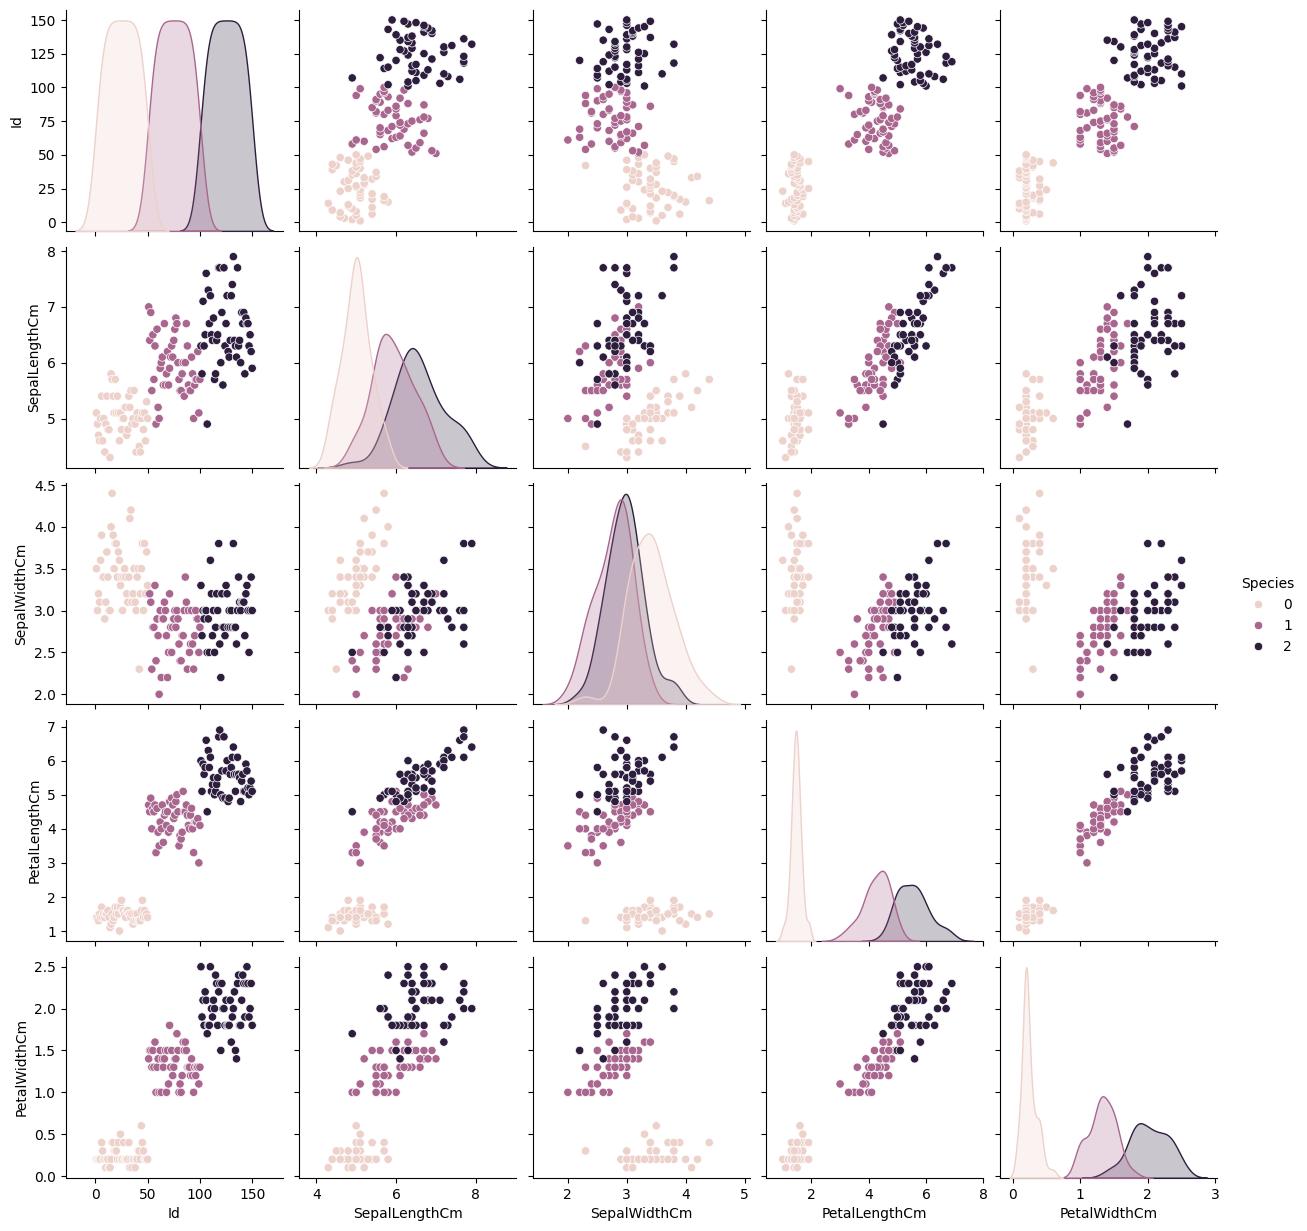

In [126]:
import seaborn as sns
sns.pairplot(df, hue='Species')

In [127]:
new_df=df[df['Species']!=0][['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [128]:
new_df.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [129]:
X= new_df.iloc[:,:2]
y= new_df.iloc[:,-1]

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [131]:
clf1= LogisticRegression()
clf2= KNeighborsClassifier()
clf3= RandomForestClassifier()

In [132]:
estimators = [('lr',clf1),('knn',clf2),('rf',clf3)]

In [133]:
for estimator in estimators:
    scores = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy')
    print(estimator[0], np.round(np.mean(scores),2))

lr 0.75
knn 0.62
rf 0.61


In [134]:
from sklearn.ensemble import VotingClassifier

## Hard Voting

In [135]:
vc= VotingClassifier(estimators=estimators)
x=cross_val_score(vc, X, y, cv=10, scoring='accuracy')
print('Voting Classifier(Hard)', np.round(np.mean(x),2))

Voting Classifier(Hard) 0.67


## Soft Voting

In [136]:
vc = VotingClassifier(estimators=estimators, voting='soft')
x=cross_val_score(vc, X, y, cv=10, scoring='accuracy')
print('Voting Classifier(Soft)', np.round(np.mean(x),2))

Voting Classifier(Soft) 0.66


## Weighted Voting

In [137]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.65
for i=1,j=1,k=2 0.62
for i=1,j=1,k=3 0.6
for i=1,j=2,k=1 0.65
for i=1,j=2,k=2 0.64
for i=1,j=2,k=3 0.62
for i=1,j=3,k=1 0.64
for i=1,j=3,k=2 0.64
for i=1,j=3,k=3 0.62
for i=2,j=1,k=1 0.69
for i=2,j=1,k=2 0.64
for i=2,j=1,k=3 0.65
for i=2,j=2,k=1 0.66
for i=2,j=2,k=2 0.64
for i=2,j=2,k=3 0.64
for i=2,j=3,k=1 0.67
for i=2,j=3,k=2 0.66
for i=2,j=3,k=3 0.64
for i=3,j=1,k=1 0.7
for i=3,j=1,k=2 0.68
for i=3,j=1,k=3 0.62
for i=3,j=2,k=1 0.7
for i=3,j=2,k=2 0.65
for i=3,j=2,k=3 0.65
for i=3,j=3,k=1 0.68
for i=3,j=3,k=2 0.66
for i=3,j=3,k=3 0.64


## Using the same Algorithm(Hyperparameter Approach for one algo with different parameters)

In [138]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [139]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


## Voting regressor

In [141]:
import numpy as np
import pandas as pd


In [142]:
df=pd.read_csv('../Machine_Learning/Boston.csv')

In [143]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [144]:
X.shape, y.shape

((1000, 20), (1000,))

In [145]:
X

array([[ 5.88891819,  2.64867662, -0.42728226, ..., -5.52022952,
         0.0364453 , -1.960039  ],
       [ 6.97517717,  3.01467478,  2.00089741, ..., -0.83596798,
         4.47708461, -1.93954487],
       [ 4.75991699, -0.55221295,  2.85151795, ...,  5.51656237,
         1.01637356,  1.99141629],
       ...,
       [-3.40090052, -1.07897489,  6.81679768, ..., -2.32336045,
        -5.11813849, -0.37726175],
       [-0.71293638, -1.67674502,  0.15460334, ...,  1.90768572,
        -0.91455953, -3.1331576 ],
       [ 0.59748892,  3.4254834 ,  0.74847355, ...,  0.73366379,
         0.92401359,  0.95631051]], shape=(1000, 20))

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [147]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()

In [148]:
estimators = [('lr',lr),('dt',dt),('svr',svr)]


In [149]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

lr 0.52
dt 0.04
svr 0.73


In [150]:
from sklearn.ensemble import VotingRegressor

In [151]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.6


In [152]:
for i in range(1,4):
  for j in range(1,4):
    for k in range(1,4):
      vr = VotingRegressor(estimators,weights=[i,j,k])
      scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
      print("For i={},j={},k={}".format(i,j,k),np.round(np.mean(scores),2))


For i=1,j=1,k=1 0.6
For i=1,j=1,k=2 0.66
For i=1,j=1,k=3 0.68
For i=1,j=2,k=1 0.52
For i=1,j=2,k=2 0.58
For i=1,j=2,k=3 0.63
For i=1,j=3,k=1 0.41
For i=1,j=3,k=2 0.51
For i=1,j=3,k=3 0.58
For i=2,j=1,k=1 0.59
For i=2,j=1,k=2 0.65
For i=2,j=1,k=3 0.67
For i=2,j=2,k=1 0.57
For i=2,j=2,k=2 0.6
For i=2,j=2,k=3 0.63
For i=2,j=3,k=1 0.49
For i=2,j=3,k=2 0.54
For i=2,j=3,k=3 0.59
For i=3,j=1,k=1 0.6
For i=3,j=1,k=2 0.63
For i=3,j=1,k=3 0.66
For i=3,j=2,k=1 0.55
For i=3,j=2,k=2 0.6
For i=3,j=2,k=3 0.64
For i=3,j=3,k=1 0.5
For i=3,j=3,k=2 0.57
For i=3,j=3,k=3 0.6


In [153]:
# using the same algorithm

dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)

In [154]:
estimators = [('dt1',dt1),('dt2',dt2),('dt3',dt3),('dt4',dt4),('dt5',dt5)]

In [155]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

dt1 0.13
dt2 0.21
dt3 0.29
dt4 0.25
dt5 0.05


In [156]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.36


## Bagging Classifier